In [8]:
import librosa
import soundfile as sf
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt


audio_path = r"/content/best_recording.wav"
y, sr = librosa.load(audio_path, sr=None)

y_trim, _ = librosa.effects.trim(y)
trimmed_audio_path = "trimmed_speech.wav"
sf.write(trimmed_audio_path, y_trim, sr)

original_audio, _ = librosa.load(audio_path, sr=None)
trimmed_audio, _ = librosa.load(trimmed_audio_path, sr=None)

print("Original Audio:")
ipd.display(ipd.Audio(original_audio, rate=sr))

print("Trimmed Audio:")
ipd.display(ipd.Audio(trimmed_audio, rate=sr))

Original Audio:


Trimmed Audio:


In [9]:
import librosa
import soundfile as sf
import IPython.display as ipd

audio_path = r"/content/best_recording.wav"
y, sr = librosa.load(audio_path, sr=None)

# Split the audio based on detected silences
split_intervals = librosa.effects.split(y, top_db=30)  # Adjust top_db as needed

# Save each split interval as a separate audio file and display
for i, (start, end) in enumerate(split_intervals):
    split_audio = y[start:end]
    split_audio_path = f"split_{i}.wav"
    sf.write(split_audio_path, split_audio, sr)
    split_audio, _ = librosa.load(split_audio_path, sr=None)
    print(f"Split Audio {i}:")
    ipd.display(ipd.Audio(split_audio, rate=sr))

Split Audio 0:


Split Audio 1:


Split Audio 2:


Split Audio 3:


Split Audio 4:


Split Audio 5:


Split Audio 6:


Split Audio 7:


Split Audio 8:


Split Audio 9:


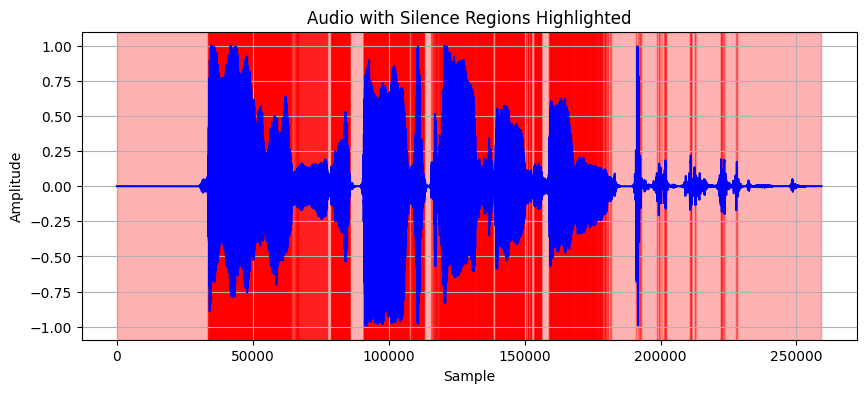

In [10]:
# Define a function to calculate the energy of a given signal
def calculate_energy(signal):
    squared_signal = np.square(signal)  # Calculate the squared signal
    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples
    return energy

# Function to detect silence based on energy threshold
def detect_silence(signal, threshold):
    energy = calculate_energy(signal)
    if energy < threshold:  # If the energy is below the threshold, consider it as silence
        return True
    else:
        return False

# Load the audio file
file_path = "/content/best_recording.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Define an energy threshold for silence detection
energy_threshold = 0.01  # Adjust this threshold as needed

# Detect silence regions in the audio
silence_regions = []
current_region = []
for i, sample in enumerate(audio_signal):
    if detect_silence(sample, energy_threshold):
        current_region.append(i)
    elif current_region:
        silence_regions.append(current_region)
        current_region = []
if current_region:
    silence_regions.append(current_region)

# Plot the waveform with silence regions highlighted
plt.figure(figsize=(10, 4))
plt.plot(audio_signal, color='b')
for region in silence_regions:
    plt.axvspan(region[0], region[-1], color='r', alpha=0.3)
plt.title("Audio with Silence Regions Highlighted")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()